In [105]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Datos Rayleigh(2.7) y Rayleigh(7.5) generados a partir del método F^-1:

In [106]:
data1=np.random.random(size=10000)
inv1=np.sqrt(-2*2.7**2*np.log(1-data1))

data2=np.random.random(size=10000)
inv2=np.sqrt(-2*7.5**2*np.log(1-data2))

## Histogramas de distribución de los datos generados a partir del método F^-1:

Text(0.5, 1.0, 'Rayleigh(7.5)')

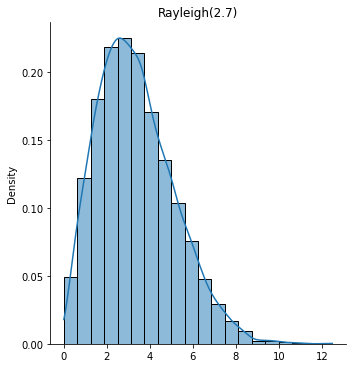

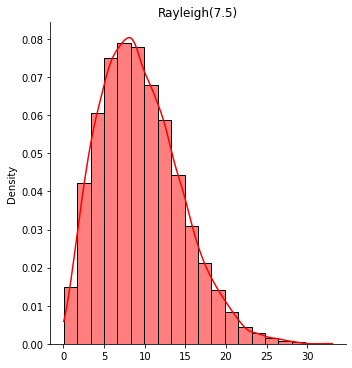

In [107]:
sns.displot(inv1, bins=20,label='simulación Rayleigh 2.7',stat="density",kde=True)
plt.title('Rayleigh(2.7)')
#plt.savefig('Histograma27.png',bbox_inches="tight")
sns.displot(inv2, bins=20,label='simulación Rayleigh 7.5',color='red',stat="density",kde=True)
plt.title('Rayleigh(7.5)')
#plt.savefig('Histograma75.png',bbox_inches="tight")

## Estimación de densidad de los datos de Rayleigh(2.7) con la respectiva densidad de la distribución Rayleigh(2.7):

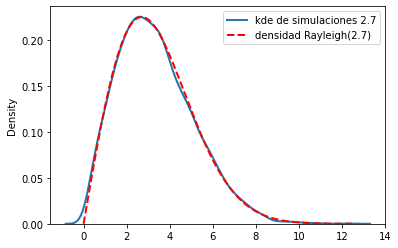

In [108]:
x1=np.linspace(0,np.amax(inv1),10000)
y1=x1*np.exp(-x1*x1/(2*2.7**2))/(2.7**2)

sns.kdeplot(data=inv1, label='kde de simulaciones 2.7',linewidth=2)
plt.plot(x1,y1,label='densidad Rayleigh(2.7)',linestyle='dashed',linewidth=2,color='red')
#plt.savefig('KDE27.png')
plt.legend(loc=1)

## Estimación de densidad de los datos de Rayleigh(7.5) con la respectiva densidad de la distribución Rayleigh(7.5):

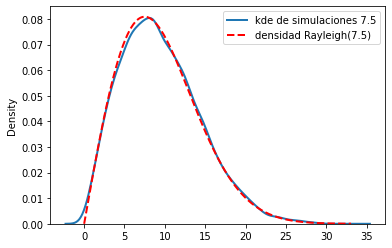

In [109]:
x2=np.linspace(0,np.amax(inv2),10000)
y2=x2*np.exp(-x2*x2/(2*7.5**2))/(7.5**2)

sns.kdeplot(data=inv2, label='kde de simulaciones 7.5',linewidth=2)
plt.plot(x2,y2,label='densidad Rayleigh(7.5)',linestyle='dashed',linewidth=2,color='red')
#plt.savefig('KDE75.png')
plt.legend(loc=1)

## q-q plot Rayleigh(2.7):

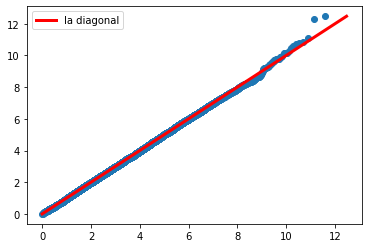

In [110]:
indices=np.linspace(0,0.9999,10000)
cuantiles1=np.sqrt(-2*2.7**2*np.log(1-indices))
plt.scatter(cuantiles1,np.sort(inv1))
diag_x1=np.linspace(0,np.max(inv1),100)
diag_y1=np.linspace(0,np.max(inv1),100)
plt.plot(diag_x1,diag_y1, 'r', label='la diagonal',linewidth=3)
plt.legend(loc=2)
#plt.savefig('qqplot27.png')

## q-q plot Rayleigh(7.5):

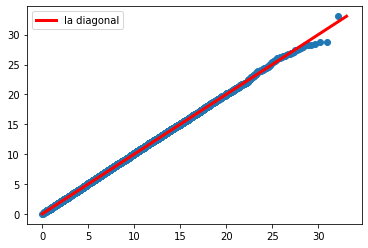

In [111]:
cuantiles2=np.sqrt(-2*7.5**2*np.log(1-indices))
plt.scatter(cuantiles2,np.sort(inv2))
diag_x2=np.linspace(0,np.max(inv2),100)
diag_y2=np.linspace(0,np.max(inv2),100)
plt.plot(diag_x2,diag_y2,'r',linewidth=3, label='la diagonal')
plt.legend(loc=2)
#plt.savefig('qqplot75.png')

## Función para generar los 500 valores de $\hat{\theta}_1$ y $\hat{\theta}_2$ para $\theta=2.7$ que toma $n$ como parámetro:

In [112]:
def estimadores1(n):
    Muestras=[]
    for i in range(0,500):
        data=np.random.random(size=n)
        inv=np.sqrt(-2*2.7**2*np.log(1-data))
        Muestras.append(inv)
    T1=[]
    for i in range(0,500):
        T1.append(np.sqrt(2/math.pi)*np.average(Muestras[i]))
    T2=[]
    for i in range(0,500):
        S2=np.sum(Muestras[i]**2)
        T2.append(np.sqrt(S2/(2*n)))
    return (T1,T2)

## Función para generar los 500 valores de $\hat{\theta}_1$ y $\hat{\theta}_2$ para $\theta=7.5$ que toma $n$ como parámetro:

In [113]:
def estimadores2(n):
    Muestras=[]
    for i in range(0,500):
        data=np.random.random(size=n)
        inv=np.sqrt(-2*7.5**2*np.log(1-data))
        Muestras.append(inv)
    T1=[]
    for i in range(0,500):
        T1.append(np.sqrt(2/math.pi)*np.average(Muestras[i]))
    T2=[]
    for i in range(0,500):
        S2=np.sum(Muestras[i]**2)
        T2.append(np.sqrt(S2/(2*n)))
    return (T1,T2)

## Boxplots de $\hat{\theta}_1$ y $\hat{\theta}_2$:

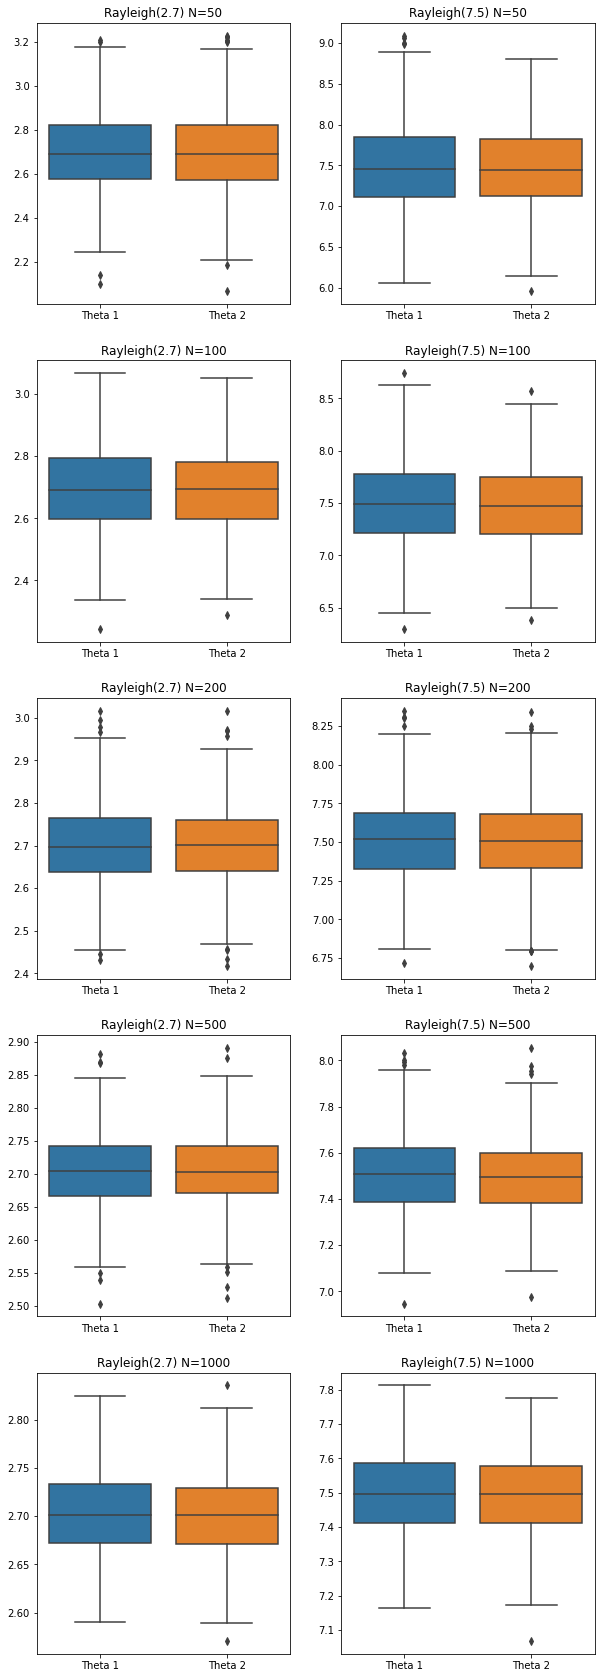

In [114]:
fig, axes = plt.subplots(5,2,figsize=(10, 30))
n=[50,100,200,500,1000]
succ1=[]
for i in range(0,5):
    succ1.append(estimadores1(n[i]))
    sns.boxplot(ax=axes[i][0],data=succ1[i])
    axes[i][0].set_xticklabels(['Theta 1','Theta 2'])
    axes[i][0].set_title('Rayleigh(2.7) N='+str(n[i]))
succ2=[]
for i in range(0,5):
    succ2.append(estimadores2(n[i]))
    sns.boxplot(ax=axes[i][1],data=succ2[i])
    axes[i][1].set_xticklabels(['Theta 1','Theta 2'])
    axes[i][1].set_title('Rayleigh(7.5) N='+str(n[i]))
#plt.savefig('Boxplots.png')

Para Rayleigh(2.7)

succ1[0] es el vector (T1,T2) para N=50

succ1[1] es el vector (T1,T2) para N=100

etc

succ1[0][0] es el vector T1 para N=50

succ1[0][1] es el vector T2 para N=50

etc

succ2 es lo mismo pero para Rayleigh(7.5)

## Estimación del sesgo y el ECM para $\theta=2.7$:
Cada celda es de la forma:

Bias de $\hat{\theta}_1$

ECM de $\hat{\theta}_1$

Bias de $\hat{\theta}_2$

ECM de $\hat{\theta}_2$

para N=50,100,...

In [115]:
T1bias50=np.mean(succ1[0][0])-2.7
T1ecm50=T1bias50**2+np.var(succ1[0][0])
T2bias50=np.mean(succ1[0][1])-2.7
T2ecm50=T2bias50**2+np.var(succ1[0][1])
T1bias50,T1ecm50,T2bias50,T2ecm50

(0.0005030933289882356,
 0.036032095287584325,
 -0.0018175587679509775,
 0.035361685019377996)

In [116]:
T1bias100=np.mean(succ1[1][0])-2.7
T1ecm100=T1bias100**2+np.var(succ1[1][0])
T2bias100=np.mean(succ1[1][1])-2.7
T2ecm100=T2bias100**2+np.var(succ1[1][1])
T1bias100,T1ecm100,T2bias100,T2ecm100

(-0.005432889824007248,
 0.01946312877921883,
 -0.01026104481217116,
 0.018017407644680065)

In [117]:
T1bias200=np.mean(succ1[2][0])-2.7
T1ecm200=T1bias200**2+np.var(succ1[2][0])
T2bias200=np.mean(succ1[2][1])-2.7
T2ecm200=T2bias200**2+np.var(succ1[2][1])
T1bias200,T1ecm200,T2bias200,T2ecm200

(-0.0004913124032217553,
 0.009045500486472529,
 0.00013783535698941307,
 0.008216541770386776)

In [118]:
T1bias500=np.mean(succ1[3][0])-2.7
T1ecm500=T1bias500**2+np.var(succ1[3][0])
T2bias500=np.mean(succ1[3][1])-2.7
T2ecm500=T2bias500**2+np.var(succ1[3][1])
T1bias500,T1ecm500,T2bias500,T2ecm500

(0.0054639676912091595,
 0.0036956854682236966,
 0.005090571519057452,
 0.0035240260205832855)

In [119]:
T1bias1000=np.mean(succ1[4][0])-2.7
T1ecm1000=T1bias1000**2+np.var(succ1[4][0])
T2bias1000=np.mean(succ1[4][1])-2.7
T2ecm1000=T2bias1000**2+np.var(succ1[4][1])
T1bias1000,T1ecm1000,T2bias1000,T2ecm1000

(0.001735954763920855,
 0.0019297582100315258,
 0.0003211274832319866,
 0.0018076223769499414)

## Eficiencia relativa  $\text{Eff}(\hat{\theta}_1,\hat{\theta}_2)$ como estimadores de $\theta=2.7$ para $n=50,100,...$ :

In [120]:
T1T2Eff50=np.var(succ1[0][1])/np.var(succ1[0][0])
T1T2Eff100=np.var(succ1[1][1])/np.var(succ1[1][0])
T1T2Eff200=np.var(succ1[2][1])/np.var(succ1[2][0])
T1T2Eff500=np.var(succ1[3][1])/np.var(succ1[3][0])
T1T2Eff1000=np.var(succ1[4][1])/np.var(succ1[4][0])
T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000

(0.9813092907730977,
 0.9217081289274206,
 0.9083789289217199,
 0.954248178702407,
 0.9381208009609824)

## Gráficas de $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\theta}_1))$ y $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\theta}_2))$ respectivamente:

(-0.9888469905617396, 0.5636838628454942)

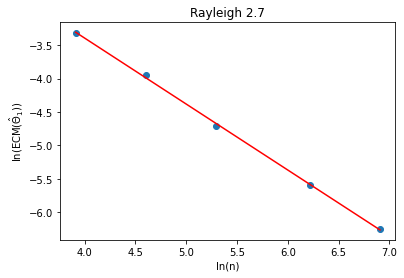

In [121]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T1ecm50,T1ecm100,T1ecm200,T1ecm500,T1ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\Theta}_1$))")
plt.title('Rayleigh 2.7')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)27 T1.png')

(-0.9961062223883442, 0.5417881205835667)

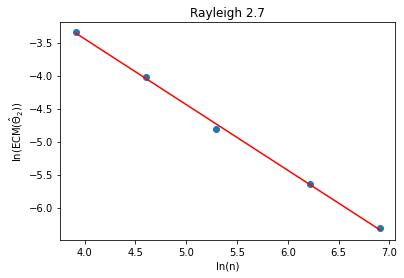

In [122]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T2ecm50,T2ecm100,T2ecm200,T2ecm500,T2ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\Theta}_2$))")
plt.title('Rayleigh 2.7')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)27 T2.png')

## Estimación del sesgo y el ECM para $\theta=7.5$:
Cada celda es de la forma:

Bias de $\hat{\theta}_1$

ECM de $\hat{\theta}_1$

Bias de $\hat{\theta}_2$

ECM de $\hat{\theta}_2$

para N=50,100,...

In [123]:
T1bias50=np.mean(succ2[0][0])-7.5
T1ecm50=T1bias50**2+np.var(succ2[0][0])
T2bias50=np.mean(succ2[0][1])-7.5
T2ecm50=T2bias50**2+np.var(succ2[0][1])
T1bias50,T1ecm50,T2bias50,T2ecm50

(-0.013213209440187335,
 0.3099001753177707,
 -0.03461183167343407,
 0.2728989828822942)

In [124]:
T1bias100=np.mean(succ2[1][0])-7.5
T1ecm100=T1bias100**2+np.var(succ2[1][0])
T2bias100=np.mean(succ2[1][1])-7.5
T2ecm100=T2bias100**2+np.var(succ2[1][1])
T1bias100,T1ecm100,T2bias100,T2ecm100

(-0.004676644611989467,
 0.16040262153674764,
 -0.019446855860333123,
 0.14394318465120337)

In [125]:
T1bias200=np.mean(succ2[2][0])-7.5
T1ecm200=T1bias200**2+np.var(succ2[2][0])
T2bias200=np.mean(succ2[2][1])-7.5
T2ecm200=T2bias200**2+np.var(succ2[2][1])
T1bias200,T1ecm200,T2bias200,T2ecm200

(0.005431508335478341,
 0.0733345709710082,
 -0.0011835983804084904,
 0.06737120860608352)

In [126]:
T1bias500=np.mean(succ2[3][0])-7.5
T1ecm500=T1bias500**2+np.var(succ2[3][0])
T2bias500=np.mean(succ2[3][1])-7.5
T2ecm500=T2bias500**2+np.var(succ2[3][1])
T1bias500,T1ecm500,T2bias500,T2ecm500

(0.0023631643070487485,
 0.03013777838291626,
 -0.0010651735079578728,
 0.026486737747052864)

In [127]:
T1bias1000=np.mean(succ2[4][0])-7.5
T1ecm1000=T1bias1000**2+np.var(succ2[4][0])
T2bias1000=np.mean(succ2[4][1])-7.5
T2ecm1000=T2bias1000**2+np.var(succ2[4][1])
T1bias1000,T1ecm1000,T2bias1000,T2ecm1000

(-0.004339926639771896,
 0.015786606489890633,
 -0.006236712316632698,
 0.014361337352368506)

## Eficiencia relativa  $\text{Eff}(\hat{\theta}_1,\hat{\theta}_2)$ como estimadores de $\theta=7.5$ para $n=50,100,...$ :

In [128]:
T1T2Eff50=np.var(succ2[0][1])/np.var(succ2[0][0])
T1T2Eff100=np.var(succ2[1][1])/np.var(succ2[1][0])
T1T2Eff200=np.var(succ2[2][1])/np.var(succ2[2][0])
T1T2Eff500=np.var(succ2[3][1])/np.var(succ2[3][0])
T1T2Eff1000=np.var(succ2[4][1])/np.var(succ2[4][0])
T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000

(0.8772313812888459,
 0.8951510949549825,
 0.9190334036582051,
 0.8789802460250892,
 0.9083363966581491)

## Gráficas de $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\theta}_1))$ y $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\theta}_2))$ respectivamente:

(-1.0029136123473337, 2.750298967426585)

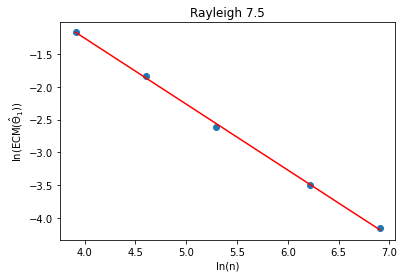

In [129]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T1ecm50,T1ecm100,T1ecm200,T1ecm500,T1ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\Theta}_1$))")
plt.title('Rayleigh 7.5')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)75 T1.png')

(-0.9978634378077422, 2.6142930116887877)

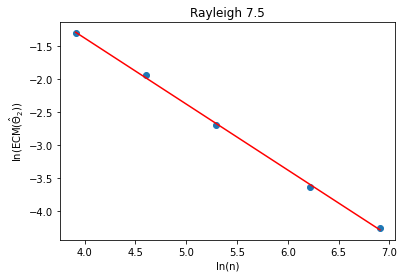

In [130]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T2ecm50,T2ecm100,T2ecm200,T2ecm500,T2ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\Theta}_2$))")
plt.title('Rayleigh 7.5')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)75 T2.png')